第11章 数据挖掘案例

11.1 良/恶性乳腺肿瘤预测

In [1]:
import pandas as pd
import numpy as np
column_names=['number','Cl_Thickness','Unif_cell_size','Unif_cell_shape','Marg_Adhesion','Sing_epith_cell_size','Bare_nuclei','Bland_chromation','Norm_nuclei','Mitoses','Class']
data=pd.read_csv('breast-cancer-wisconsin.data',names=column_names)
display(data.head())


number  Cl_Thickness  Unif_cell_size  Unif_cell_shape  Marg_Adhesion  \
0  1000025             5               1                1              1   
1  1002945             5               4                4              5   
2  1015425             3               1                1              1   
3  1016277             6               8                8              1   
4  1017023             4               1                1              3   

   Sing_epith_cell_size Bare_nuclei  Bland_chromation  Norm_nuclei  Mitoses  \
0                     2           1                 3            1        1   
1                     7          10                 3            2        1   
2                     2           2                 3            1        1   
3                     3           4                 3            7        1   
4                     2           1                 3            1        1   

   Class  
0      2  
1      2  
2      2  
3      2  
4      2

In [2]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
number                  699 non-null int64
Cl_Thickness            699 non-null int64
Unif_cell_size          699 non-null int64
Unif_cell_shape         699 non-null int64
Marg_Adhesion           699 non-null int64
Sing_epith_cell_size    699 non-null int64
Bare_nuclei             699 non-null object
Bland_chromation        699 non-null int64
Norm_nuclei             699 non-null int64
Mitoses                 699 non-null int64
Class                   699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


查看数据的基本统计信息

In [3]:
data.describe()

number  Cl_Thickness  Unif_cell_size  Unif_cell_shape  \
count  6.990000e+02    699.000000      699.000000       699.000000   
mean   1.071704e+06      4.417740        3.134478         3.207439   
std    6.170957e+05      2.815741        3.051459         2.971913   
min    6.163400e+04      1.000000        1.000000         1.000000   
25%    8.706885e+05      2.000000        1.000000         1.000000   
50%    1.171710e+06      4.000000        1.000000         1.000000   
75%    1.238298e+06      6.000000        5.000000         5.000000   
max    1.345435e+07     10.000000       10.000000        10.000000   

       Marg_Adhesion  Sing_epith_cell_size  Bland_chromation  Norm_nuclei  \
count     699.000000            699.000000        699.000000   699.000000   
mean        2.806867              3.216023          3.437768     2.866953   
std         2.855379              2.214300          2.438364     3.053634   
min         1.000000              1.000000          1.000000     1.000000   
25%         1.000000              2.000000          2.000000     1.000000   
50%         1.000000              2.000000          3.000000     1.000000   
75%         4.000000              4.000000          5.000000     4.000000   
max        10.000000             10.000000         10.000000    10.000000   

          Mitoses       Class  
count  699.000000  699.000000  
mean     1.589413    2.689557  
std      1.715078    0.951273  
min      1.000000    2.000000  
25%      1.000000    2.000000  
50%      1.000000    2.000000  
75%      1.000000    4.000000  
max     10.000000    4.000000

4.统计数据属性中的空缺值

In [4]:
data.isnull().sum()

number                  0
Cl_Thickness            0
Unif_cell_size          0
Unif_cell_shape         0
Marg_Adhesion           0
Sing_epith_cell_size    0
Bare_nuclei             0
Bland_chromation        0
Norm_nuclei             0
Mitoses                 0
Class                   0
dtype: int64

5.如果数据中存在空缺数据需要丢弃或填充。该数据集中包含了16个缺失值用“？”标出。因此要删除有缺失值的数据。

In [5]:
data=data.replace(to_replace='?',value=np.nan)
data=data.dropna(how='any')
print(data.shape)


(683, 11)


6.将数据划分为训练集和测试集

In [6]:
from sklearn.model_selection import train_test_split
# 划分训练集与测试集
X_train,X_test,y_train,y_test=train_test_split(data[column_names[1:10]],data[column_names[10]],test_size=0.25,random_state=33)
print('训练样本的数量和类别分布：\n',y_train.value_counts())


训练样本的数量和类别分布：
 2    344
4    168
Name: Class, dtype: int64


7.标准化数据，每个维度的特征数据方差为1，均值为0，使得预测结果不会被某些维度过大的特征值主导。

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
print(X_train.mean())


5.011423375044109e-18


8. 分别用LogisticRegression与SGDClassifier构建分类器。

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
lr=LogisticRegression()
sgdc=SGDClassifier()
lr.fit(X_train,y_train)
lr_y_predict=lr.predict(X_test)
sgdc.fit(X_train,y_train)
sgdc_y_predict=sgdc.predict(X_test)


d:\Users\wx165\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


9. LR分类器性能分析

In [9]:
from sklearn.metrics import classification_report
print('Accuracy of LR Classifier:',lr.score(X_test,y_test))
print(classification_report(y_test,lr_y_predict,target_names=['Benign','Malignant']))


Accuracy of LR Classifier: 0.9883040935672515
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       100
   Malignant       0.99      0.99      0.99        71

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



10. SGD分类器性能分析

In [10]:
print('Accuracy of SGD Classifier:',sgdc.score(X_test,y_test))
print(classification_report(y_test,sgdc_y_predict,target_names=['Benign','Malignant']))


Accuracy of SGD Classifier: 0.9590643274853801
              precision    recall  f1-score   support

      Benign       0.94      0.99      0.97       100
   Malignant       0.98      0.92      0.95        71

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



11.2 泰坦尼克号乘客生还预测

1. 数据描述与导入

In [11]:
import pandas as pd
import numpy as np
titanic=pd.read_csv('titanic.txt')
# titanic=pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')
titanic.head()


row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
4  Montreal, PQ / Chesterville, ON  C22         NaN     11    male

2. 查看数据的基本情况

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


3. 查看数据缺失值信息

In [13]:
titanic.isnull().sum()

row.names       0
pclass          0
survived        0
name            0
age           680
embarked      492
home.dest     559
room         1236
ticket       1244
boat          966
sex             0
dtype: int64

4. 特征选取。根据对该事件的了解，选取sex，age和pclass三个决定幸免与否的关键因素。

In [14]:
X = titanic[['pclass', 'age', 'sex']]
y = titanic['survived']
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
pclass    1313 non-null object
age       633 non-null float64
sex       1313 non-null object
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


5. 对年龄字段进行空缺值填充

In [15]:
X['age'].fillna(X['age'].mean(), inplace=True)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
pclass    1313 non-null object
age       1313 non-null float64
sex       1313 non-null object
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


d:\Users\wx165\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


6. 查看pclass和生还数据survived的数据取值分布

In [16]:
print(X['pclass'].value_counts())
print(y.value_counts())


3rd    711
1st    322
2nd    280
Name: pclass, dtype: int64
0    864
1    449
Name: survived, dtype: int64


7. 针对性别，绘制年龄字段的盒图。

In [17]:
import seaborn as sns
sns.boxplot(x='sex',y='age',data=X)


8. 划分训练集和测试集，并将数据中的类别型特征进行编码。

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 33)
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
print(vec.feature_names_)
X_test = vec.transform(X_test.to_dict(orient='record'))


['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']


9. 构建随机森林

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_y_pred=rfc.predict(X_test)


d:\Users\wx165\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


10. 对分类器进行评估。

In [20]:
from sklearn.metrics import classification_report
print('The accuracy of random forest:',rfc.score(X_test,y_test))
print(classification_report(rfc_y_pred,y_test))


The accuracy of random forest: 0.78419452887538
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       233
           1       0.60      0.79      0.68        96

    accuracy                           0.78       329
   macro avg       0.75      0.79      0.76       329
weighted avg       0.81      0.78      0.79       329



11.3 图像的聚类分割

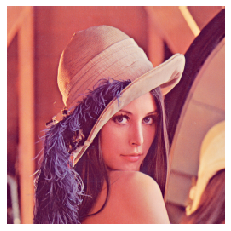

In [21]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import PIL.Image as Image
%matplotlib inline
img=Image.open('lena.jpg')
plt.axis('off')
plt.imshow(img)


2. 显示图像的基本信息和图像大小。

In [22]:
print(img.info)
row,col=img.size
print('图像的大小：',row,col)


{'compression': 'raw', 'dpi': (72, 72)}
图像的大小： 256 256


3. 显示图像的颜色模式

In [23]:
print('数据类型',type(img))
print( '图像的颜色模式：',img.mode)


数据类型 <class 'PIL.TiffImagePlugin.TiffImageFile'>
图像的颜色模式： RGB


4. 对图像数据进行聚类并显示每个像素的簇标号。

In [24]:
imgData=np.array(img.getdata())
type(imgData)
pixel_vals = imgData.reshape(-1,3)
pixel_vals
km_cluster = KMeans(n_clusters=3)
label=km_cluster.fit_predict(pixel_vals) 
print('每个像素的簇标号：\n',label)


每个像素的簇标号：
 [0 0 0 ... 2 2 2]


5. 显示分割后的图像

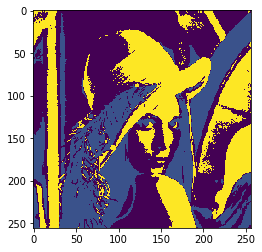

In [25]:
label = label.reshape([row,col]).T  
pic_new = Image.new("L", (row, col))  
for i in range(row): 
    for j in range(col):       
        pic_new.putpixel((i,j), int(int(256/(label[i][j]+1))))  
plt.imshow(pic_new)
